In [ ]:
The dataset is designed for machine learning classification tasks and contains in total 60 000 training and 10 000 test images (gray scale) with each 28x28 pixel. Each training and test case is associated with one of ten labels (0–9)


In [3]:
# Import required packages and functions and set the session seed
import numpy as np
np.random.seed(1234)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout, SpatialDropout2D
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [8]:
# Load the Fashion MNIST data from Keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# Normalize the image data by dividing through the maximum pixel value (=255)
train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

We start by building a simple neural network containing one hidden layer. Note that as here we use the untransformed but normalized data, we need to flatten the 28 by 28 pixels input first. We add one hidden densely-connected layer which performs output = relu(dot(input, kernel) + bias), where the rectified linear unit (relu) activation function has been proven to work well. We set the number of nodes equal to 128, because this seems to work well in our case. The number of nodes could essentially be any of the numbers 32, 64, 128, 256 and 512, as these are in a sequence of multiples between the number of nodes in the output (= 10) and input (= 784) layers. The softmax layer then assigns predicted probabilities to each of the ten clothing categories, which is also why there are ten nodes in this layer.

In [6]:
# Build a simple three-layer (1 hidden layer) model
# The input size is 28 x 28 pixels and is flattened to a vector of length 784
# The activation function is RELU (rectified linear unit) and performs the 
# multiplication of input and weights (plus bias)
# The output (softmax) layer returns probabilities for all ten classes
three_layer_model = Sequential()
three_layer_model.add(Flatten(input_shape = (28, 28)))
three_layer_model.add(Dense(128, activation = 'relu'))
three_layer_model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


After building the neural network, we compile it. We specify sparse_categorical_crossentropy as the loss function, which is suitable for categorical multi-class responses. The optimizer controls the learning rate; adam (adaptive moment estimation) is similar to classical stochastic gradient descent and usually a safe choice for the optimizer. We set our metric of interest to be the accuracy, or the percentage of correctly classified images. Hereafter, we fit the model onto our training data set using ten iterations through the training data (“epochs”). Here, 70% is used for training and 30% is used for validation.



In [7]:
# Compile the model with accuracy metric and adam optimizer
# Sparse categorical cross-entropy is the loss function for integer labels
# Fit the model using 70 percent of the data and 10 epochs
three_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                          optimizer = 'adam', metrics = ['accuracy'])
three_layer_model.fit(train_images, train_labels, epochs = 10, 
                      validation_split = 0.3, verbose = 2)


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 11s - loss: 0.5336 - accuracy: 0.8143 - val_loss: 0.4403 - val_accuracy: 0.8492
Epoch 2/10
 - 10s - loss: 0.3992 - accuracy: 0.8575 - val_loss: 0.3984 - val_accuracy: 0.8622
Epoch 3/10
 - 10s - loss: 0.3572 - accuracy: 0.8713 - val_loss: 0.3596 - val_accuracy: 0.8677
Epoch 4/10
 - 10s - loss: 0.3285 - accuracy: 0.8795 - val_loss: 0.3622 - val_accuracy: 0.8682
Epoch 5/10
 - 10s - loss: 0.3070 - accuracy: 0.8873 - val_loss: 0.3440 - val_accuracy: 0.8759
Epoch 6/10
 - 10s - loss: 0.2927 - accuracy: 0.8924 - val_loss: 0.3270 - val_accuracy: 0.8839
Epoch 7/10
 - 10s - loss: 0.2784 - accuracy: 0.8975 - val_loss: 0.3323 - val_accuracy: 0.8822
Epoch 8/10
 - 10s - loss: 0.2660 - accuracy: 0.9003 - val_loss: 0.3339 - val_accuracy: 0.8839
Epoch 9/10
 - 10s - loss: 0.2572 - accuracy: 0.9042 - val_loss: 0.3477 - val_accuracy: 0.8786
Epoch 10/10
 - 10s - loss: 0.2479 - accuracy: 0.9069 - val_loss: 0.3478 - val_accuracy: 0.8759


Next, we print the results of the model in terms of training and testing loss and accuracy.



In [8]:
# Compute and print the test loss and accuracy
test_loss, test_acc = three_layer_model.evaluate(test_images, test_labels)
print("Model with three layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with three layers and ten epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 48us/step
Model with three layers and ten epochs -- Test loss: 37.564722998142244
Model with three layers and ten epochs -- Test accuracy: 87.09


We can see that the neural network with one hidden layer already performs relatively well with a test accuracy of 87.09%. However, it seems like we are slightly overfitting (i.e. the model is fitted too well to a particular data set and therefore does not well extend to other data sets), as the training set accuracy (88.15%) is slightly higher than the test set accuracy. There are several ways to avoid overfitting in neural networks, such as simplifying our model by reducing the number of hidden layers and neurons, adding dropout layers that randomly remove some of the connections between layers, and early stopping when validation loss starts to increase. Later on in this post, I will demonstrate some of these methods to you. For further reading, I personally like this and this post showing how to avoid overfitting when building neural networks using keras. Instead, to see whether a deep neural network performs better at predicting clothing categories, we build a neural network with three hidden layers in a similar way as before.

In [9]:
# Similarly as before, build a five-layer (3 hidden layers) model
five_layer_model = Sequential()
five_layer_model.add(Flatten(input_shape = (28, 28)))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(10, activation = 'softmax'))

In [10]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 10 epochs
five_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                         optimizer = 'adam', metrics = ['accuracy'])
five_layer_model.fit(train_images, train_labels, epochs = 10, 
                     validation_split = 0.3, verbose = 2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 8s - loss: 0.5244 - acc: 0.8120 - val_loss: 0.4311 - val_acc: 0.8476
Epoch 2/10
 - 7s - loss: 0.3799 - acc: 0.8594 - val_loss: 0.3547 - val_acc: 0.8723
Epoch 3/10
 - 7s - loss: 0.3435 - acc: 0.8731 - val_loss: 0.3834 - val_acc: 0.8597
Epoch 4/10
 - 7s - loss: 0.3204 - acc: 0.8816 - val_loss: 0.4051 - val_acc: 0.8595
Epoch 5/10
 - 7s - loss: 0.3008 - acc: 0.8876 - val_loss: 0.3801 - val_acc: 0.8619
Epoch 6/10
 - 7s - loss: 0.2855 - acc: 0.8920 - val_loss: 0.3164 - val_acc: 0.8858
Epoch 7/10
 - 7s - loss: 0.2716 - acc: 0.8976 - val_loss: 0.3603 - val_acc: 0.8739
Epoch 8/10
 - 7s - loss: 0.2613 - acc: 0.9010 - val_loss: 0.3277 - val_acc: 0.8859
Epoch 9/10
 - 7s - loss: 0.2478 - acc: 0.9065 - val_loss: 0.3611 - val_acc: 0.8738
Epoch 10/10
 - 7s - loss: 0.2426 - acc: 0.9096 - val_loss: 0.3602 - val_acc: 0.8701


In [11]:
# Compute and print the test loss and accuracy
test_loss, test_acc = five_layer_model.evaluate(test_images, test_labels)
print("Model with five layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with five layers and ten epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 1s 57us/step
Model with five layers and ten epochs -- Test loss: 38.866063070297244
Model with five layers and ten epochs -- Test accuracy: 86.4


It seems like the model with two additional layers does not perform better than the previous one with only one hidden layer, given that both the training (87.42%) and test set (86.03%) accuracies are lower and the loss (38.49) is higher. Let’s try whether adding another five hidden layers improves model performance, or whether we can include that increasing model complexity does not improve performance.

In [12]:
# Similarly as before, build a ten-layer (8 hidden layers) model
ten_layer_model = Sequential()
ten_layer_model.add(Flatten(input_shape = (28, 28)))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(10, activation = 'softmax'))

In [13]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 10 epochs
ten_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                        optimizer = 'adam', metrics = ['accuracy'])
ten_layer_model.fit(train_images, train_labels, epochs = 10, 
                    validation_split = 0.3, verbose = 2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 12s - loss: 0.5908 - acc: 0.7852 - val_loss: 0.4850 - val_acc: 0.8327
Epoch 2/10
 - 10s - loss: 0.4296 - acc: 0.8448 - val_loss: 0.4259 - val_acc: 0.8468
Epoch 3/10
 - 10s - loss: 0.3886 - acc: 0.8616 - val_loss: 0.4002 - val_acc: 0.8511
Epoch 4/10
 - 11s - loss: 0.3638 - acc: 0.8689 - val_loss: 0.4008 - val_acc: 0.8636
Epoch 5/10
 - 11s - loss: 0.3470 - acc: 0.8749 - val_loss: 0.3682 - val_acc: 0.8678
Epoch 6/10
 - 11s - loss: 0.3259 - acc: 0.8809 - val_loss: 0.3866 - val_acc: 0.8661
Epoch 7/10
 - 10s - loss: 0.3130 - acc: 0.8876 - val_loss: 0.3562 - val_acc: 0.8729
Epoch 8/10
 - 10s - loss: 0.3056 - acc: 0.8889 - val_loss: 0.3682 - val_acc: 0.8696
Epoch 9/10
 - 10s - loss: 0.2922 - acc: 0.8935 - val_loss: 0.3439 - val_acc: 0.8809
Epoch 10/10
 - 10s - loss: 0.2793 - acc: 0.8992 - val_loss: 0.3399 - val_acc: 0.8829


In [14]:
# Compute and print the test loss and accuracy
test_loss, test_acc = ten_layer_model.evaluate(test_images, test_labels)
print("Model with ten layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with ten layers and ten epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 1s 83us/step
Model with ten layers and ten epochs -- Test loss: 36.5664215695858
Model with ten layers and ten epochs -- Test accuracy: 87.61


The model with eight hidden layers performs best in terms of training (88.21%) and test (87.58%) accuracy as well as loss (36.12). Nevertheless, the difference in performance between the first model with one hidden layer and the current model with eight hidden layers is only quite small. Although it seems that with so many hidden layers, we can model additional complexity that improves the accuracy of the model, we must ask ourselves whether increasing model complexity at the cost of interpretability and computational feasibility is worth this slight improvement in accuracy and loss.

Now that we have seen how the number of hidden layers affects model performance, let’s try and see whether increasing the number of epochs (i.e. the number of times the model iterates through the training data) from ten to fifty improves the performance of our first neural network with one hidden layer.

In [15]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 50 epochs
three_layer_model_50_epochs = three_layer_model.fit(train_images, train_labels, 
                                                  epochs = 50, validation_split = 0.3,
                                                  verbose = 2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
 - 6s - loss: 0.2355 - acc: 0.9119 - val_loss: 0.3279 - val_acc: 0.8823
Epoch 2/50
 - 6s - loss: 0.2266 - acc: 0.9168 - val_loss: 0.3180 - val_acc: 0.8879
Epoch 3/50
 - 6s - loss: 0.2194 - acc: 0.9187 - val_loss: 0.3233 - val_acc: 0.8863
Epoch 4/50
 - 6s - loss: 0.2109 - acc: 0.9218 - val_loss: 0.3260 - val_acc: 0.8878
Epoch 5/50
 - 6s - loss: 0.2062 - acc: 0.9231 - val_loss: 0.3592 - val_acc: 0.8770
Epoch 6/50
 - 6s - loss: 0.1960 - acc: 0.9272 - val_loss: 0.3394 - val_acc: 0.8832
Epoch 7/50
 - 6s - loss: 0.1919 - acc: 0.9279 - val_loss: 0.3382 - val_acc: 0.8907
Epoch 8/50
 - 6s - loss: 0.1875 - acc: 0.9299 - val_loss: 0.3392 - val_acc: 0.8894
Epoch 9/50
 - 6s - loss: 0.1801 - acc: 0.9330 - val_loss: 0.3422 - val_acc: 0.8900
Epoch 10/50
 - 6s - loss: 0.1758 - acc: 0.9332 - val_loss: 0.3469 - val_acc: 0.8892
Epoch 11/50
 - 6s - loss: 0.1710 - acc: 0.9366 - val_loss: 0.3454 - val_acc: 0.8892
Epoch 12/50
 - 6s - loss: 0.1644 - 

In [16]:
# Compute and print the test loss and accuracy
test_loss, test_acc = three_layer_model.evaluate(test_images, test_labels)
print("Model with three layers and fifty epochs -- Test loss:", test_loss * 100)
print("Model with three layers and fifty epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 1s 63us/step
Model with three layers and fifty epochs -- Test loss: 57.36023781448603
Model with three layers and fifty epochs -- Test accuracy: 87.99


The three-layer model trained with fifty epochs has the highest train (89.32%) and test (88.68%) accuracies we have seen so far. However, the loss (54.73) is also about a third larger than we have seen before. Additionally, the model is also less time-efficient, given that the increase in accuracy is not substantial but the model takes significantly longer to fit. To better understand the trade-off between minimizing loss and maximizing accuracy, we plot model loss and accuracy over the number of epochs for the training and cross-validation data.

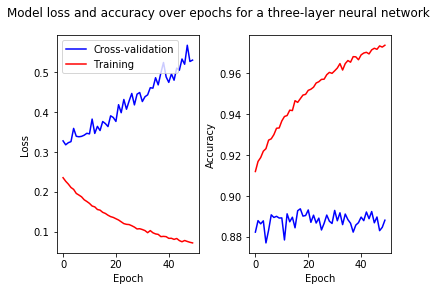

In [17]:
# Plot loss as function of epochs
plt.subplot(1, 2, 1)
plt.plot(three_layer_model_50_epochs.history['val_loss'], 'blue')
plt.plot(three_layer_model_50_epochs.history['loss'], 'red')
plt.legend(['Cross-validation', 'Training'], loc = 'upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot accuracy as function of epochs
plt.subplot(1, 2, 2)
plt.plot(three_layer_model_50_epochs.history['val_acc'], 'blue')
plt.plot(three_layer_model_50_epochs.history['acc'], 'red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplots_adjust(wspace = .35)

# Include plot title and show the plot
plt.suptitle('Model loss and accuracy over epochs for a three-layer neural network')
plt.show()

We observe that for the training data, loss decreases to zero while accuracy increases to one, as a result of overfitting. This is why we also check how the model performs on the cross-validation data, for which we observe that loss increases with the number of epochs while accuracy remains relatively stable. Using this figure, we can select an “optimal” number of epochs such that accuracy is maximized while loss is minimized. Looking at the cross-validation data accuracy, we see that the accuracy peak lays at around 20 epochs, for which loss is approximately 0.4. However, similar accuracies but much lower losses and modelling time are achieved with around 6 and 12 epochs, and so we might rather choose to train our model with around 6 or 20 epochs.

Regarding the model output, the predictions returned are probabilities per class or clothing category. We can calculate the majority vote by taking class that has the maximum of predicted probabilities of all classes. We can print the first ten elements of the majority_vote dictionary, which we can obtain as follows:

In [18]:
# Calculate and print predictions versus actual labels
predictions = three_layer_model.predict(test_images)
for i in range(10):
  print("Prediction " + str(i) + ": " + str(np.argmax(np.round(predictions[i]))))
  print("Actual " + str(i) + ": " + str(test_labels[i]))

Prediction 0: 9
Actual 0: 9
Prediction 1: 2
Actual 1: 2
Prediction 2: 1
Actual 2: 1
Prediction 3: 1
Actual 3: 1
Prediction 4: 6
Actual 4: 6
Prediction 5: 1
Actual 5: 1
Prediction 6: 4
Actual 6: 4
Prediction 7: 6
Actual 7: 6
Prediction 8: 5
Actual 8: 5
Prediction 9: 7
Actual 9: 7


All except the fifth (number 4) prediction are correct. In the fifth prediction, a shirt (category 6) is being misclassified as a top (category 0).

# Convolutional Neural Network
I also wanted to show you how to build a convolutional neural network and compare its performance to the neural networks presented earlier, mostly because convolutional neural networks have generally been shown to perform better on visual image data. Essentially, what happens in a convolutional neural network is that a smaller matrix (the “filter matrix” or “kernel”) slides over the full image matrix, moving pixel by pixel, multiplies the filter matrix with the part of the full image matrix covered by the filter matrix on that moment, sums up these values and then repeats this until the full image matrix has been covered. For a more extensive explanation on how convolutional neural networks, I refer you to this page or this page.

As we need to prepare our data slightly differently for a convolutional neural network, we reload the data and reshape the images to “flatten” them. The last “1” in the reshape dimensions stand for a greyscale, as we have images on a black-to-white scale. If we would have RGB images, we would change the “1” into a “3”.

In [19]:
# Reload the data for a convolutional neural network
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

We make sure the the values of the pixels, ranging from zero to 255, are of the float type and then we normalize the values as before.



In [20]:
# Reshape the data to the correct format (the last 1 stands for greyscale)
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [21]:
# Convert the image data to numeric data and normalize them
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

The convolutional neural network cannot deal with categorical labels. Therefore, we transform the labels to binary vectors, where all vectors have length ten (as there are ten categories), a “1” at the index of the category and zeros elsewhere. For example, category 3 and 8 would be coded as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] and [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], respectively. This transformation is referred to as “one hot encoding”.

In [22]:
# One-hot encode the label data
# Convert every number to a vector of the length of the number of categories
# The vector has zero everywhere except a one on the position of the number it 
# represents. Example: 3 = [0 0 0 1 0 0 0 0 0 0]
train_labels_bin = to_categorical(train_labels)
test_labels_bin = to_categorical(test_labels)

Now, we can start building our convolutional neural network. The first layer Conv2D is a convolutional layer that takes a 2-dimensional matrix of 28 by 28 pixels in greyscale (1) as input. As before, we use 128 nodes in this layer, as the size of the data is not extremely large and we want to avoid making our model unnecessarily complex. The filter matrix is of size 3 by 3, which is quite standard. As before, we use the rectified linear (“relu”) activation function. The MaxPooling2D layer reduces the dimensionality (and thus required computational power) by outputting the maximum of the part of the input image that is captured by the filter matrix. The Flatten layer simply flattens the result from the previous layer into a vector. As we saw before, the softmax layer then assigns predicted probabilities to each of the ten clothing categories. Note that we use the same optimizer and metric as before, but that we now use “categorical_crossentropy” as the loss function instead of “sparse_categorical_crossentropy”. The reason for this is that the former works for one-hot encoded labels, whereas the other works for categorical labels.

In [23]:
# Build a convolutional neural network with two convolutional layers
conv_model = Sequential()
conv_model.add(Conv2D(128, (3, 3), input_shape = (28, 28, 1)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size = (2, 2)))
conv_model.add(Conv2D(128, (3, 3)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size = (2, 2)))
conv_model.add(Flatten())
conv_model.add(Dense(128))
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

We fit our model to the training data, where we set the batch_size argument equal to the number of neurons in the convolutional layers (= 128).

In [24]:
# Compile and fit the model with adam optimizer and accuracy metric
# Categorical cross-entropy is the loss function for one-hot encoded labels and
# batch size equal to the number of neurons in the convolutional layers and 10 epochs
conv_model.compile(loss = "categorical_crossentropy", 
                   optimizer = 'adam', metrics = ['accuracy'])
conv_model.fit(train_images, train_labels_bin, batch_size = 128, 
               epochs = 10, verbose = 2)

Epoch 1/10
 - 209s - loss: 0.4639 - acc: 0.8333
Epoch 2/10
 - 208s - loss: 0.3025 - acc: 0.8910
Epoch 3/10
 - 206s - loss: 0.2644 - acc: 0.9041
Epoch 4/10
 - 206s - loss: 0.2345 - acc: 0.9148
Epoch 5/10
 - 206s - loss: 0.2153 - acc: 0.9216
Epoch 6/10
 - 207s - loss: 0.1937 - acc: 0.9295
Epoch 7/10
 - 207s - loss: 0.1772 - acc: 0.9353
Epoch 8/10
 - 208s - loss: 0.1599 - acc: 0.9425
Epoch 9/10
 - 212s - loss: 0.1453 - acc: 0.9482
Epoch 10/10
 - 204s - loss: 0.1328 - acc: 0.9501


In [25]:
# Compute and print the test loss and accuracy
test_loss, test_acc = conv_model.evaluate(test_images, test_labels_bin)
print("Convolutional model ten epochs -- Test loss:", test_loss * 100)
print("Convolutional model ten epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 11s 1ms/step
Convolutional model ten epochs -- Test loss: 29.167398313879968
Convolutional model ten epochs -- Test accuracy: 90.7


Although we are still overfitting, we observe that the convolutional neural network performs better than the neural networks we saw earlier, achieving a training set accuracy of 95.16% and a test set accuracy of 90.39%, and a lower loss of 28.70. This was to be expected, because convolutional neural networks have previously been shown to perform well on visual imagery data. Let’s see if we can reduce overfitting by reducing the number of neurons from 128 to 64, adding dropout layers and enabling early stopping. Note that the rate in the Dropout layer is the percentage of connections between layers that are being removed. the SpatialDropout2D is a special kind of dropout layer for convolutional neural networks, which drops certain multiplications of the filter matrix with parts of the original image before pooling across all movements over the original image.



In [26]:
# Build a convolutional neural network with two convolutional layers
# Decrease number of neurons and add dropout to reduce overfitting
conv_model_reduce_overfit = Sequential()
conv_model_reduce_overfit.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1)))
conv_model_reduce_overfit.add(Activation('relu'))
conv_model_reduce_overfit.add(MaxPooling2D(pool_size = (2, 2)))
conv_model_reduce_overfit.add(Dropout(0.5))
conv_model_reduce_overfit.add(Conv2D(64, (3, 3)))
conv_model_reduce_overfit.add(SpatialDropout2D(0.5))
conv_model_reduce_overfit.add(Activation('relu'))
conv_model_reduce_overfit.add(MaxPooling2D(pool_size = (2, 2)))
conv_model_reduce_overfit.add(Flatten())
conv_model_reduce_overfit.add(Dense(64))
conv_model_reduce_overfit.add(Dropout(0.5))
conv_model_reduce_overfit.add(Dense(10))
conv_model_reduce_overfit.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


When fitting our model, we also enable early stopping to reduce overfitting. Instead of going through all epochs specified, early stopping automatically stops the iterations through the epoch once it’s being noticed that the validation loss increases.

In [27]:
# Compile and fit the model with adam optimizer and accuracy metric
# Categorical cross-entropy is the loss function for one-hot encoded labels and
# batch size equal to the number of neurons in the convolutional layers and 10 epochs
# Add early stopping to avoid overfitting
conv_model_reduce_overfit.compile(loss = "categorical_crossentropy", 
                   optimizer = 'adam', metrics = ['accuracy'])
conv_callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)
conv_model_reduce_overfit.fit(train_images, train_labels_bin, validation_split = 0.3,
               epochs = 10, verbose = 2, callbacks = [conv_callback], batch_size = 64)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 81s - loss: 0.7721 - acc: 0.7258 - val_loss: 0.4541 - val_acc: 0.8372
Epoch 2/10
 - 80s - loss: 0.5176 - acc: 0.8179 - val_loss: 0.3976 - val_acc: 0.8557
Epoch 3/10
 - 80s - loss: 0.4587 - acc: 0.8387 - val_loss: 0.3620 - val_acc: 0.8674
Epoch 4/10
 - 79s - loss: 0.4275 - acc: 0.8484 - val_loss: 0.3414 - val_acc: 0.8759
Epoch 5/10
 - 79s - loss: 0.4074 - acc: 0.8572 - val_loss: 0.3250 - val_acc: 0.8837
Epoch 6/10
 - 80s - loss: 0.3935 - acc: 0.8606 - val_loss: 0.3122 - val_acc: 0.8874
Epoch 7/10
 - 79s - loss: 0.3836 - acc: 0.8650 - val_loss: 0.3030 - val_acc: 0.8889
Epoch 8/10
 - 78s - loss: 0.3722 - acc: 0.8674 - val_loss: 0.3009 - val_acc: 0.8906
Epoch 9/10
 - 77s - loss: 0.3678 - acc: 0.8707 - val_loss: 0.2890 - val_acc: 0.8958
Epoch 10/10
 - 78s - loss: 0.3625 - acc: 0.8710 - val_loss: 0.2894 - val_acc: 0.8940


In [28]:
# Compute and print the test loss and accuracy
test_loss, test_acc = conv_model_reduce_overfit.evaluate(test_images, test_labels_bin)
print("Convolutional model ten epochs reduced overfit -- Test loss:", test_loss * 100)
print("Convolutional model ten epochs reduced overfit -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 5s 533us/step
Convolutional model ten epochs reduced overfit -- Test loss: 30.907997370958327
Convolutional model ten epochs reduced overfit -- Test accuracy: 88.84


From the results, we observe that although the training and test accuracies have decreased, they are now much more similar than before. The test accuracy has not decreased substantially, but the training accuracy has, which means that overfitting is much less of a problem than before. Next, we can print the first ten predictions from the model and the first ten actual labels and compare them.

In [29]:
# Calculate and print predictions versus actual labels
predictions = conv_model_reduce_overfit.predict(test_images)
for i in range(10):
  print("Prediction " + str(i) + ": " + str(np.argmax(np.round(predictions[i]))))
  print("Actual " + str(i) + ": " + str(test_labels[i]))

Prediction 0: 9
Actual 0: 9
Prediction 1: 2
Actual 1: 2
Prediction 2: 1
Actual 2: 1
Prediction 3: 1
Actual 3: 1
Prediction 4: 6
Actual 4: 6
Prediction 5: 1
Actual 5: 1
Prediction 6: 4
Actual 6: 4
Prediction 7: 6
Actual 7: 6
Prediction 8: 5
Actual 8: 5
Prediction 9: 7
Actual 9: 7


Comparing these predictions to the first ten labels in the data set, we observe that the first ten predictions are correct!